In [1]:
library(tidyverse)
library(forcats) # factors munging
library(stringr) # string manipulation
library(ggthemes) # visualization
options(repr.plot.width=7, repr.plot.height=5)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
# Help

?read_csv

# Loading data

In [3]:
titanic <- read_csv("data/train.csv")

Parsed with column specification:
cols(
  PassengerId = col_integer(),
  Survived = col_integer(),
  Pclass = col_integer(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_integer(),
  Parch = col_integer(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)


In [4]:
head(titanic)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


In [5]:
summary(titanic)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

## Survival rate

In [6]:
summarise(titanic, SurvivalRate = sum(Survived) / nrow(titanic))

SurvivalRate
0.3838384


# Basic stats

In [7]:
mean(titanic$Age, na.rm = TRUE)

[1] 29.69912

In [8]:
var(titanic$Age, na.rm = TRUE)

[1] 211.0191

In [9]:
sd(titanic$Age, na.rm = TRUE)

[1] 14.5265

In [10]:
sqrt(var(titanic$Age, na.rm = TRUE))

[1] 14.5265

# Select & filter

In [32]:
first_class <- titanic %>% 
    select(Age, Pclass) %>%
    filter(Pclass == 1)

In [34]:
mean(first_class$Age, na.rm = TRUE)

[1] 38.23344

In [36]:
sd(first_class$Age, na.rm = TRUE)

[1] 14.80286

# Exploration

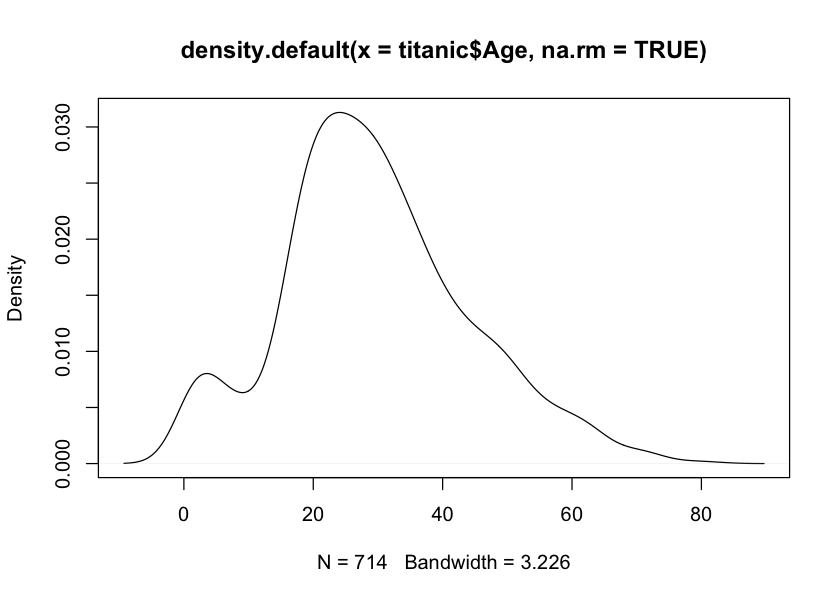

In [11]:
plot(density(titanic$Age, na.rm = TRUE))

Warning message:
“Removed 177 rows containing non-finite values (stat_density).”

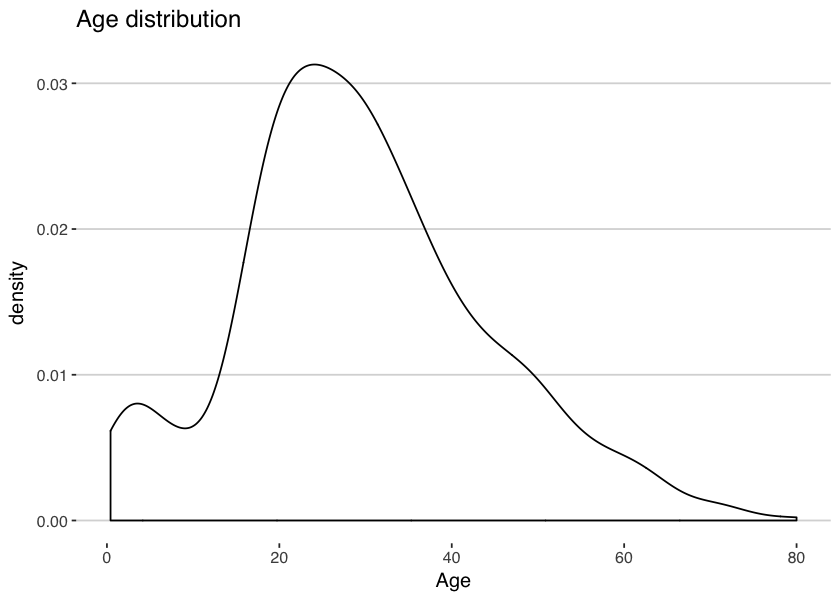

In [12]:
titanic %>%
    ggplot(aes(Age)) +
    geom_density() +
    ggtitle("Age distribution") +
    theme_hc() +
    scale_colour_hc()

Warning message:
“Removed 30 rows containing non-finite values (stat_density).”

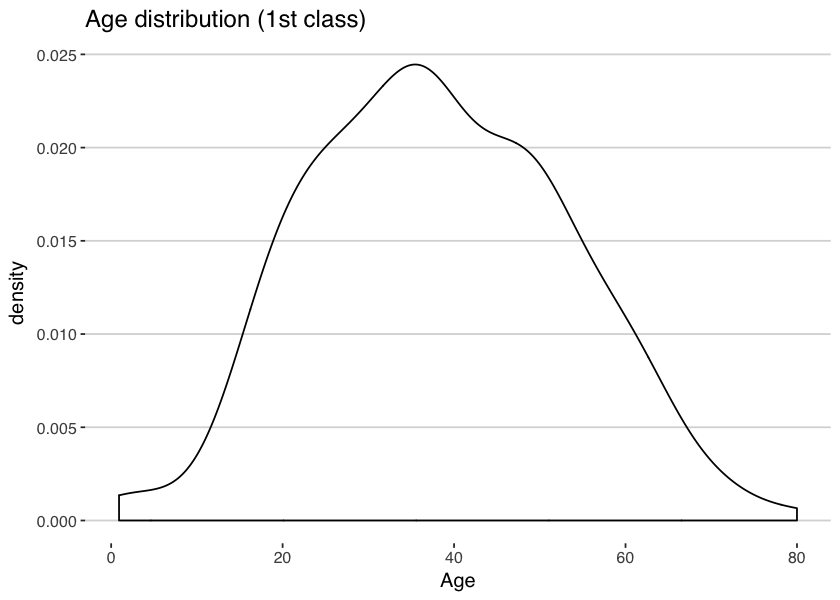

In [38]:
first_class %>%
    ggplot(aes(Age)) +
    geom_density() +
    ggtitle("Age distribution (1st class)") +
    theme_hc() +
    scale_colour_hc()

In [24]:
cor(titanic$Age, titanic$Fare, use = "complete.obs")

[1] 0.09606669

Warning message:
“Removed 177 rows containing missing values (geom_point).”

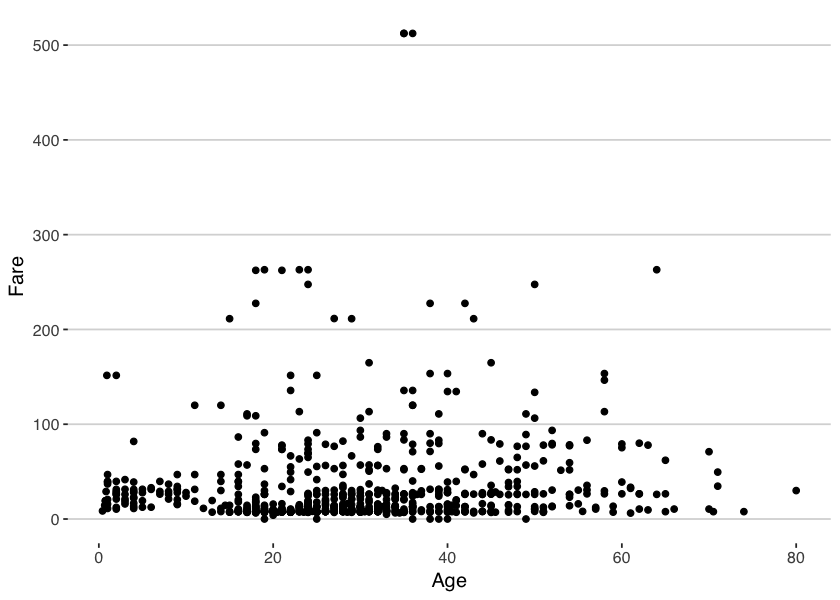

In [25]:
titanic %>%
    ggplot(aes(Age, Fare)) +
    geom_point() +
    theme_hc() +
    scale_colour_hc()

In [15]:
titanic <- titanic %>%
                mutate(Survived = factor(Survived)) %>%
                mutate(Survived = fct_recode(Survived, "No" = "0", "Yes" = "1"))

In [16]:
titanic <- titanic %>%
        mutate(Sex = factor(Sex)) %>%
        mutate(Sex = fct_recode(Sex, "Female" = "female", "Male" = "male"))

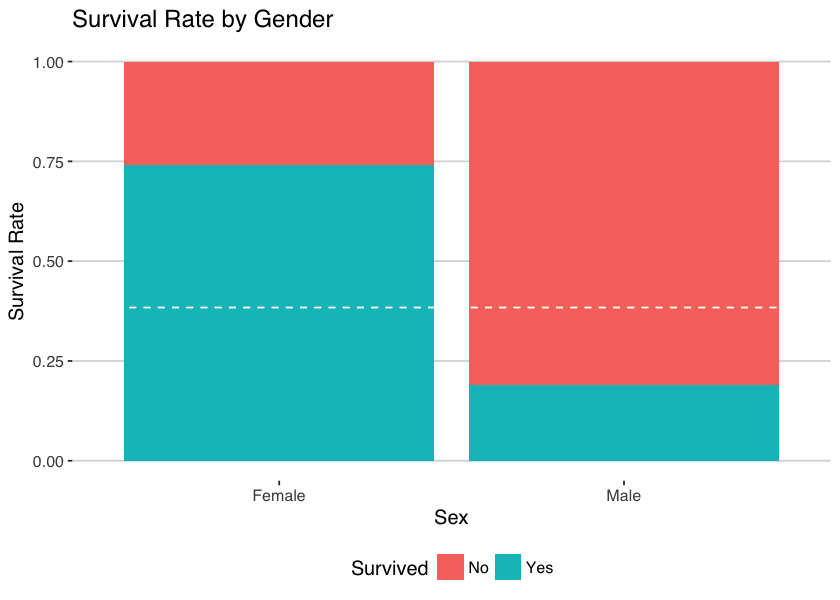

In [20]:
titanic %>% 
    ggplot(aes(Sex, fill=Survived)) +
    geom_bar(position = "fill") +
    ylab("Survival Rate") +
    geom_hline(yintercept = 0.3838384, col = "white", lty = 2) +
    ggtitle("Survival Rate by Gender") +
    theme_hc() +
    scale_colour_hc()

In [21]:
titanic <- titanic %>%
    mutate(Pclass = factor(Pclass))

Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Removed 15 rows containing non-finite values (stat_density).”

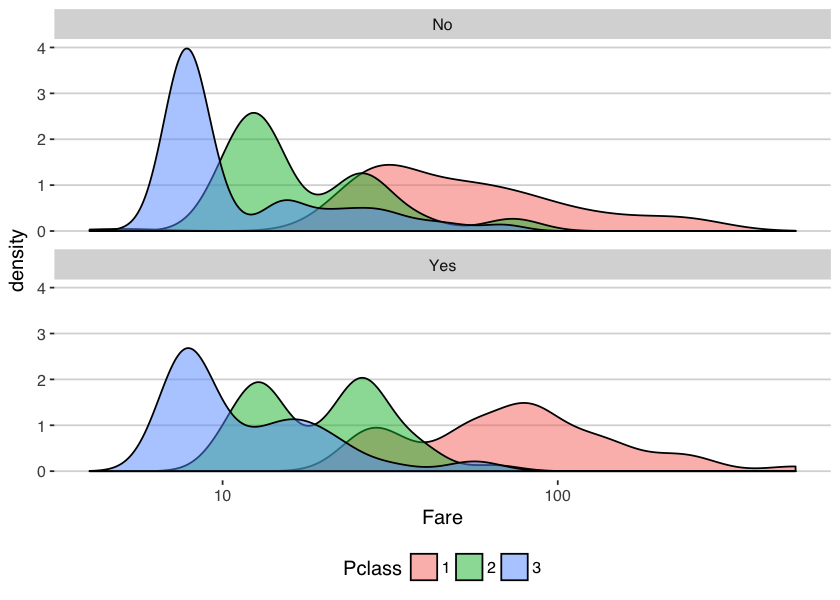

In [26]:
titanic %>%
    ggplot(aes(Fare, fill=Pclass)) +
    geom_density(alpha = 0.5) +
    scale_x_log10() +
    facet_wrap(~ Survived, ncol = 1) +
    theme_hc() +
    scale_colour_hc()

# Model

In [ ]:
test <- read_csv("data/test.csv")
model <- tibble(PassengerID = test$PassengerId, Survived = ifelse(test$Sex == 'female', 1, 0))
write_csv(model, "models/females_survive.csv")